# Data Ingestion:(10%)

In [1]:
import pandas as pd

In [3]:
df = pd.read_excel(r"C:\Users\alokg\Desktop\Machine Learing\ML_SaurabhSir\EndTermProject\Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

In [10]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [13]:
# Checking for null values and handling them (dropping or imputing as needed).
# Performing data type validation and converting categorical or numeric data appropriately.

In [15]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [17]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
# Checking for null values
print(df.isnull().sum())

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [21]:
# Encoding 'vote' Using Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode 'vote' column
le = LabelEncoder()
df['vote'] = le.fit_transform(df['vote'])
df = pd.get_dummies(df, columns=['vote'], drop_first=True)

In [31]:
# checking all columns are numeric:
print(df.dtypes)

age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                     int32
vote_1                      bool
dtype: object


In [29]:
# Since gender has only two categories (male and female), we can use Label Encoding to convert them into 0 and 1.
# Encoding 'gender' column
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [35]:
# Before computing furhter anything, checking if the DataFrame has all valid data:
print(df.shape)  # Should print (rows, columns)
print(df.head())  # Check the first few rows

(1525, 9)
   age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political.knowledge  gender  vote_1  
0                    2       0    True  
1                    2       1    True  
2                    2       1    True  
3                    0       0    True  
4                    2       1    True  


In [37]:
# force conversion in float datatype:
df = df.astype(float)  # Convert all columns to float

# 2. Exploratory Data Analysis (EDA)

In [41]:
# Performing Univariate & Bivariate Analysis

In [43]:
# Display basic info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Display first few rows
df.head()

Shape of dataset: (1525, 9)

Data Types:
 age                        float64
economic.cond.national     float64
economic.cond.household    float64
Blair                      float64
Hague                      float64
Europe                     float64
political.knowledge        float64
gender                     float64
vote_1                     float64
dtype: object

Missing Values:
 age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
vote_1                     0
dtype: int64


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0.0,1.0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0,1.0
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0,1.0
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0.0,1.0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0,1.0


<Figure size 1200x600 with 0 Axes>

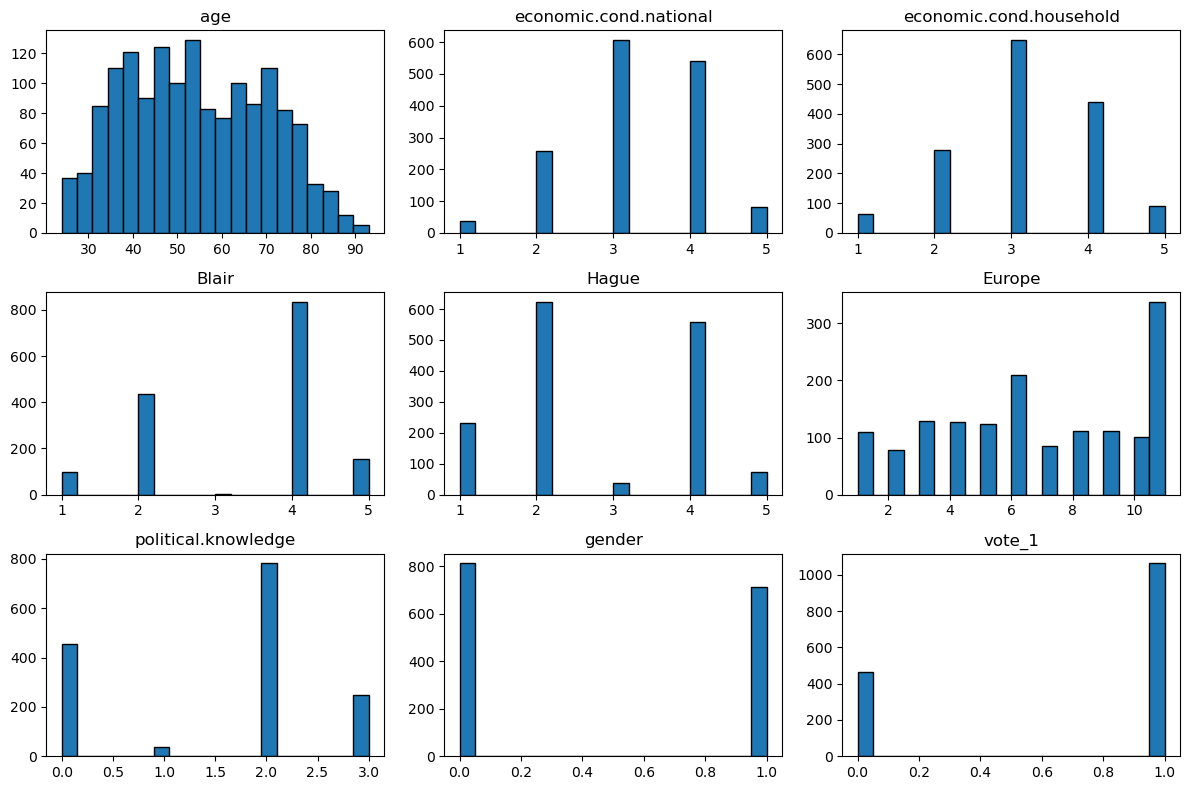

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=20, grid=False, edgecolor='black')

plt.tight_layout()
plt.show()

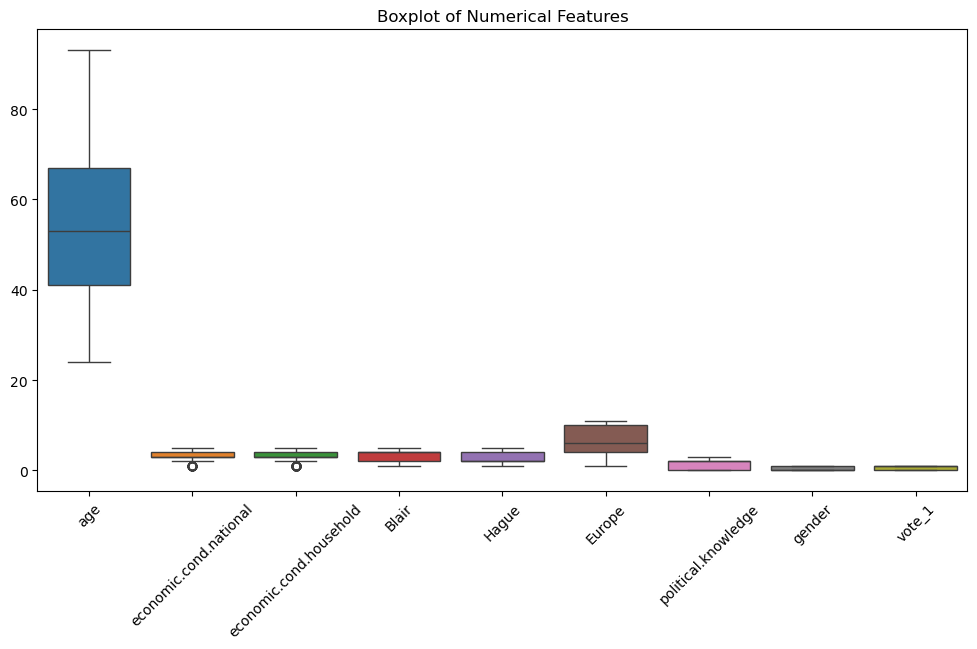

In [51]:
# Boxplots to Detect Outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

C:\Users\alokg\AppData\Local\Temp\ipykernel_11304\528731171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['vote_1'], palette='coolwarm')
C:\Users\alokg\AppData\Local\Temp\ipykernel_11304\528731171.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette='viridis')


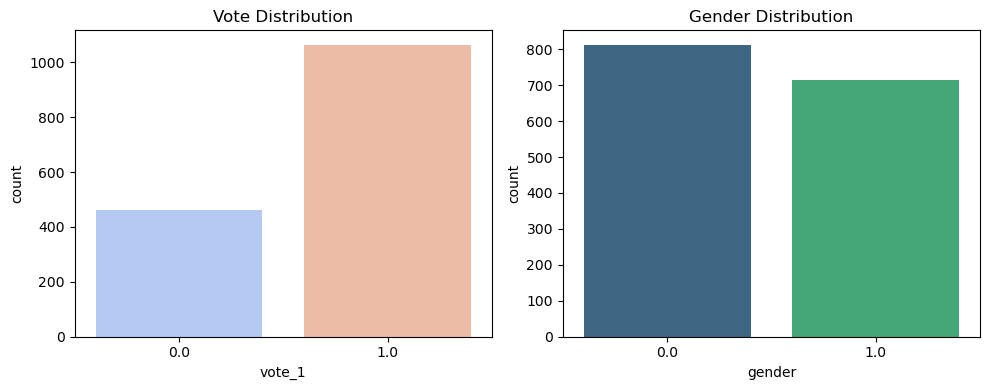

In [53]:
# Countplot for vote_1 and gender
plt.figure(figsize=(10, 4))

# Vote distribution
plt.subplot(1, 2, 1)
sns.countplot(x=df['vote_1'], palette='coolwarm')
plt.title('Vote Distribution')

# Gender distribution
plt.subplot(1, 2, 2)
sns.countplot(x=df['gender'], palette='viridis')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

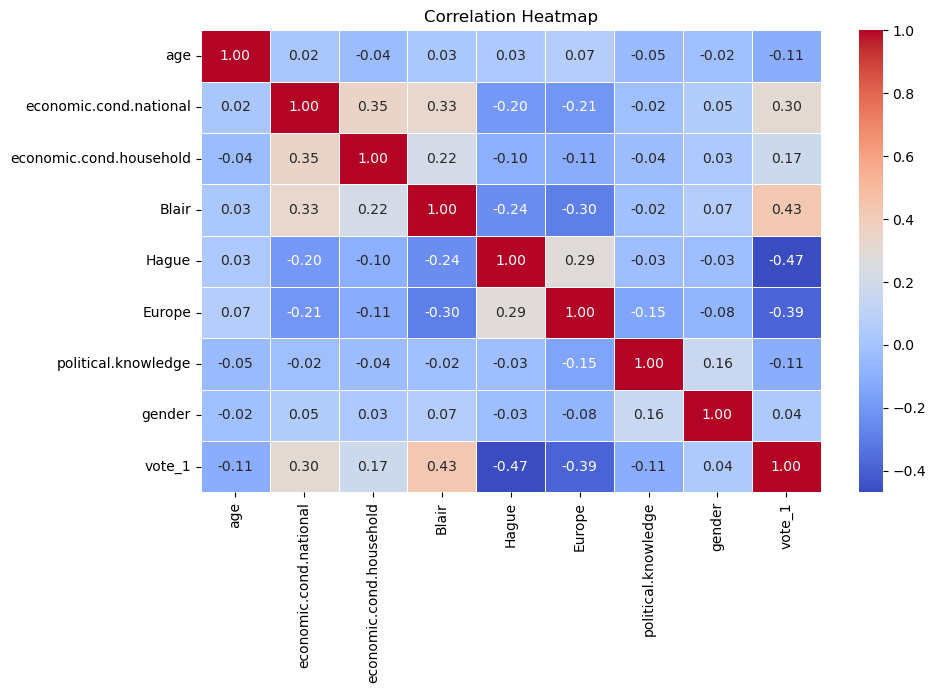

In [55]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   float64
 1   economic.cond.national   1525 non-null   float64
 2   economic.cond.household  1525 non-null   float64
 3   Blair                    1525 non-null   float64
 4   Hague                    1525 non-null   float64
 5   Europe                   1525 non-null   float64
 6   political.knowledge      1525 non-null   float64
 7   gender                   1525 non-null   float64
 8   vote_1                   1525 non-null   float64
dtypes: float64(9)
memory usage: 107.4 KB


In [67]:
# getting the target variable

In [59]:
df["vote_1"].value_counts()

vote_1
1.0    1063
0.0     462
Name: count, dtype: int64

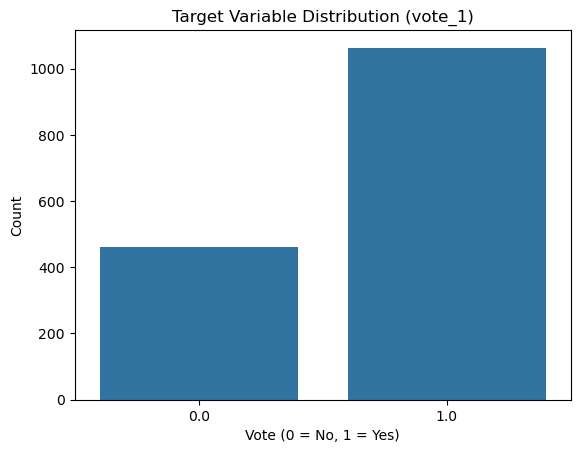

In [61]:
sns.countplot(x=df["vote_1"])
plt.title("Target Variable Distribution (vote_1)")
plt.xlabel("Vote (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

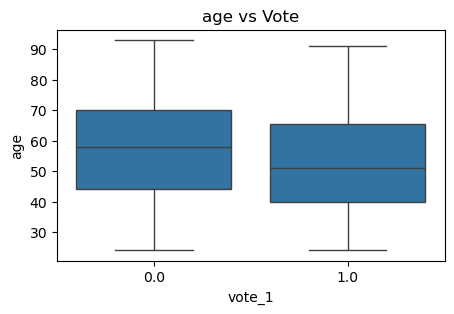

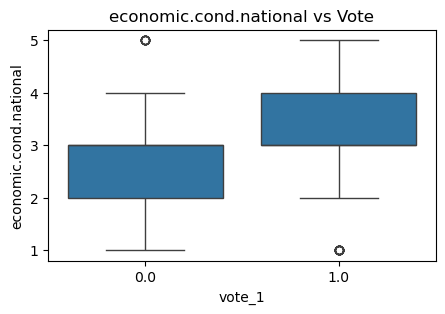

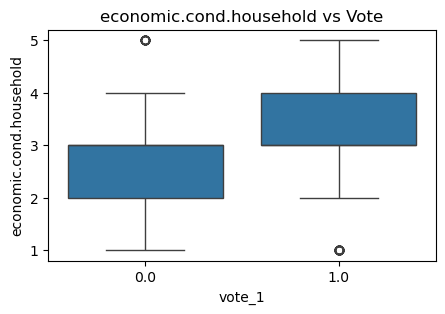

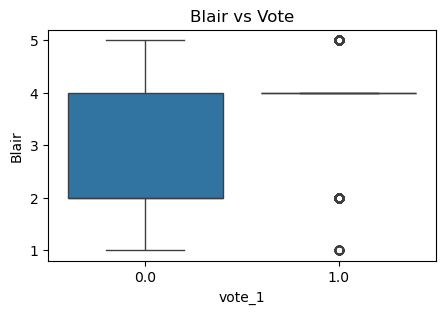

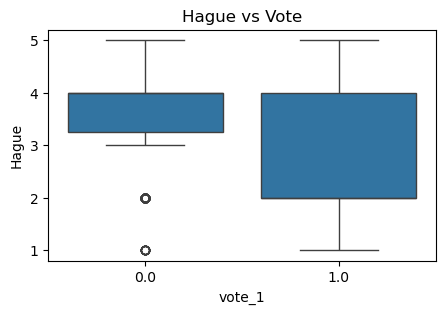

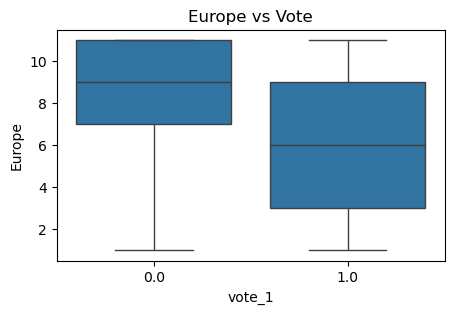

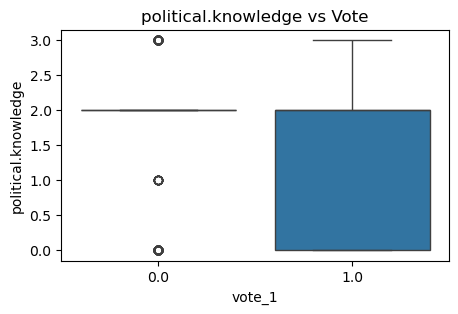

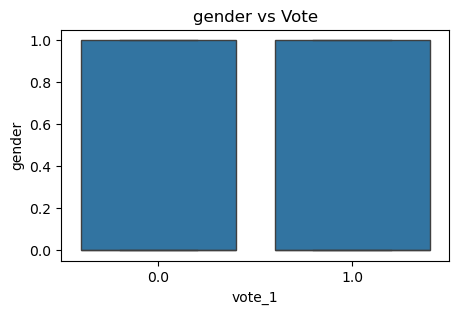

In [63]:
for col in df.columns[:-1]:  # Exclude vote_1
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df["vote_1"], y=df[col])
    plt.title(f"{col} vs Vote")
    plt.show()

In [65]:
df.corr()["vote_1"].sort_values(ascending=False)

vote_1                     1.000000
Blair                      0.427084
economic.cond.national     0.300737
economic.cond.household    0.174726
gender                     0.037191
political.knowledge       -0.108653
age                       -0.112821
Europe                    -0.385443
Hague                     -0.468508
Name: vote_1, dtype: float64

# Data Preparation

In [71]:
# Splitting Data into Train & Test

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["vote_1"])  # Features
y = df["vote_1"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [86]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Choosing Models

In [105]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

def evaluate_train_model(model, x_train, y_train):
    """ Evaluates model performance on the training set. """
    y_train_pred = model.predict(x_train)
    
    # Accuracy
    train_acc = model.score(x_train, y_train)
    print(f"Training Accuracy: {train_acc:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Train)')
    plt.show()

    # Classification Report
    print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))

    # AUC-ROC Score
    train_probs = model.predict_proba(x_train)[:, 1]
    train_auc = roc_auc_score(y_train, train_probs)
    print(f"Train AUC-ROC Score: {train_auc:.4f}")
    
    return train_acc, train_auc

def evaluate_test_model(model, x_test, y_test):
    """ Evaluates model performance on the test set. """
    y_test_pred = model.predict(x_test)
    
    # Accuracy
    test_acc = model.score(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Test)')
    plt.show()

    # Classification Report
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

    # AUC-ROC Score
    test_probs = model.predict_proba(x_test)[:, 1]
    test_auc = roc_auc_score(y_test, test_probs)
    print(f"Test AUC-ROC Score: {test_auc:.4f}")
    
    return test_acc, test_auc

In [ ]:
# finding best estimator for the model

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(5, 16),
    'min_samples_split': range(10, 30),
    'min_samples_leaf': range(10, 20),
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV for best model selection
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Optimize for recall
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best Model from GridSearch
best_grid = grid_search.best_estimator_

# Print Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 19800 candidates, totalling 99000 fits
